In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [22]:
df=pd.read_csv("Telco-Customer-Churn.csv")

In [21]:
df.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.info()

Replacing blanks with '0' wherever tenure is zero and no total charges are recorded

In [23]:
df["TotalCharges"]= df["TotalCharges"].replace(" ","0")
df["TotalCharges"]= df["TotalCharges"].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
118*12


In [ ]:
118*36

Insight: Maybe the churn rate is going up because of the high cost charges

*We are asking pandas to use the 'duplicated' feature to check for duplicates in the primary key CusID, then the 'sum' function to sum up the duplicates to merge them into one value

In [28]:
df["customerID"].duplicated().sum()

np.int64(0)

In [29]:
print(df["customerID"].duplicated().sum())

0


We are creating our own function now by defining what we want it to do.

Convert the 0 into No and 1 into Yes in the SeniorCitizen colmn

No means Cus stayed, Yes means they churned

In [33]:
def conv(value):
    if value==1:
        print("Yes")
    else:
        print("No")
df["SeniorCitizen"]==df["SeniorCitizen"].apply(conv)

No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
No
Yes
Yes
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
Yes
Yes
Yes
Yes
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
Yes
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
No
Yes
No
No
No
Yes
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
Yes
No
No
No
No
No
No
No
No
No
Yes
Yes
No
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
No
Yes
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
Yes
Yes
Yes
No
Yes
No
No
No
No
Yes
No
No
No
No
No
No
Yes
Yes
Yes
Yes
No
No
No
No
Yes
No
No
Yes
No
No
Yes
No
No
No
Yes
No
No
No
No
No
No
No
No
No
No
Yes
No
Yes
No
No
Yes
No
No
No
Yes
No
No
No
Yes
No
No
No
No
Yes
No
Yes
No
No
No
No
Yes
No
No
No
N

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: SeniorCitizen, Length: 7043, dtype: bool

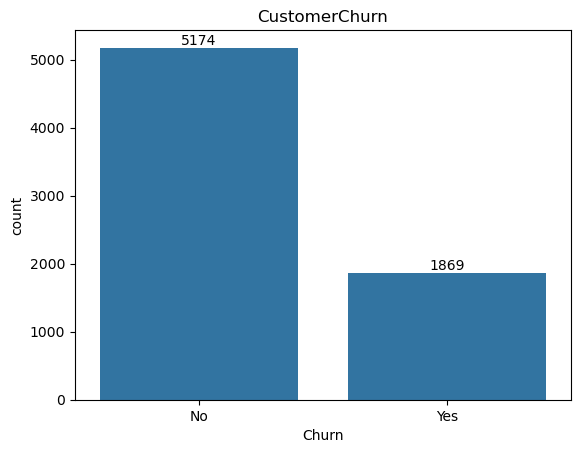

In [39]:
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("CustomerChurn")
plt.show()

In [40]:
ax.bar_label(ax.containers[0])

[Text(0, 0, '5174'), Text(0, 0, '1869')]

In [45]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({"Churn":"count"})            

<Figure size 300x400 with 0 Axes>

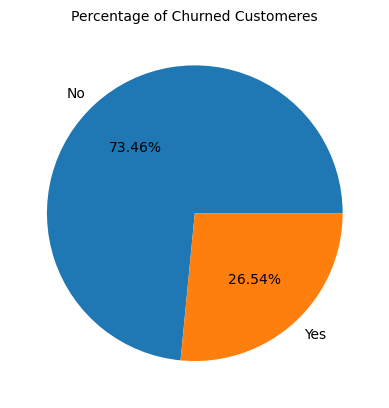

In [46]:
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customeres", fontsize = 10)
plt.show()

From the above Pie Chart, we have inferred that 26.54% of our existing customers have churned out(left) of our Telco services.
Such as Phone service, Internet service, Device protection, movie screenings, etc.

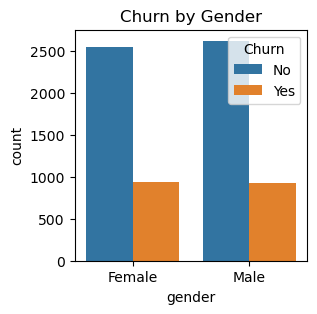

In [47]:
plt.figure(figsize = (3,3))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

We have inferref the gender- the churned and existing customers.

the 1869 no. of churned customers from the prev bar graph verifies with the above genders churned(yellow) nos.(female+male)

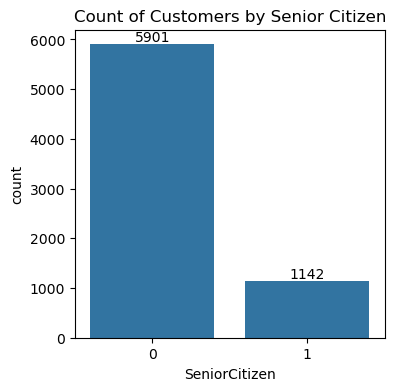

In [48]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

Now we know the no. of senior citizens (1142) out of the total customers

now,either of the two Senior or the Non-senior citizens are churning more. We just need to figure that out next

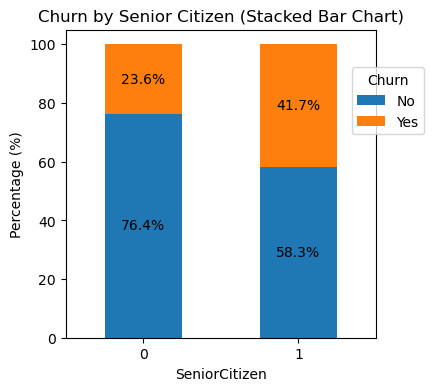

In [50]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

Final Verdict:

1. The profit is dropping because of Senior Citizens
   
2. After detailed analysis:
   a. More channels must be provided for SC
   
   b. Our payment option must be simplified
   
   c. Make our systems easier to access (create a user-friendly dashboards)